https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test

In [20]:
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import entropy, poisson, norm
from scipy.stats import kstest
import matplotlib.pyplot as plt

In [15]:
#weight height
whData = pd.read_csv('weight-height.csv')
whData.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [16]:
malesHeight = whData[whData['Gender'] == 'Male']['Height']
femalesHeight = whData[whData['Gender'] == 'Female']['Height']
print(len(malesHeight))
print(len(femalesHeight))

5000
5000


In [17]:
mCount, mDevision = np.histogram(malesHeight, bins=100) # devision = مرزها, count = تعداد
fCount, fDevision = np.histogram(femalesHeight, bins=100)

در اینجا ما دوتا فرضیه داریم یکی

H0

و دیگری فرضیه جایگزینی.. 
فرضیه صفر میگه که دوتا دیتا از یک توزیع واحد پیروی کنند و فرضیه جاگیزین میگه که دوتا دیتا از یک توزیع واحد پیروی نمیکنند... اگر

pvalue 

زیر 5 درصد بود ما میتوانیم اچ صفر را رد کنیم

In [18]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html
kstest(mCount, fCount)

KstestResult(statistic=0.05, pvalue=0.9996892272702655)

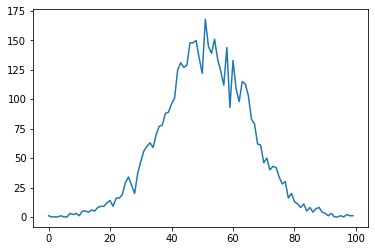

In [21]:
plt.plot(mCount)
#  PDFهیستوگرام شبیه پی دی اف است

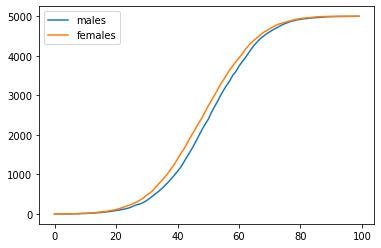

In [33]:
# CDF
plt.plot(np.cumsum(mCount), label='males') #cumulative sum
plt.plot(np.cumsum(fCount), label='females')
plt.legend(loc="upper left")

In [19]:
kstest(malesHeight, femalesHeight)

KstestResult(statistic=0.6664, pvalue=0.0)

In [40]:
malesHeight.sort_values()

4794    58.406905
2334    59.380650
4637    59.868078
2191    59.938650
1942    59.981865
          ...    
994     78.095867
1317    78.462053
3285    78.528210
3757    78.621374
2014    78.998742
Name: Height, Length: 5000, dtype: float64

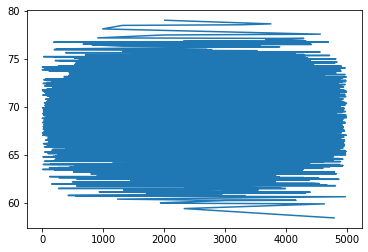

In [39]:
plt.plot(malesHeight.sort_values())

In [43]:
malesHeight.sort_values().reset_index(drop=True) #reset_index()
# با استفاده از این تابع ایندکس ها رو حذف میکنیم که باعث میشه نمودار بهتر ترسیم بشه

0       58.406905
1       59.380650
2       59.868078
3       59.938650
4       59.981865
          ...    
4995    78.095867
4996    78.462053
4997    78.528210
4998    78.621374
4999    78.998742
Name: Height, Length: 5000, dtype: float64

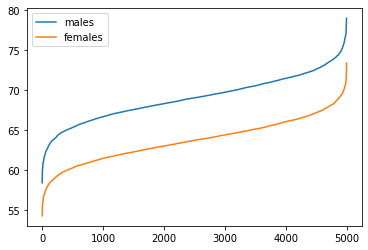

In [47]:
plt.plot(malesHeight.sort_values().reset_index(drop=True), label='males')
plt.plot(femalesHeight.sort_values().reset_index(drop=True), label='females')
plt.legend(loc="upper left")

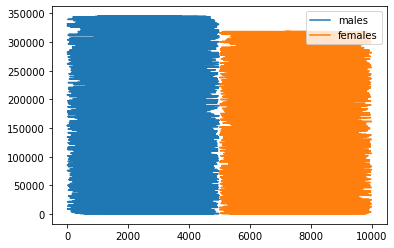

In [35]:
plt.plot(np.cumsum(malesHeight.sort_values()), label='males') #cumulative sum
plt.plot(np.cumsum(femalesHeight.sort_values()), label='females')
plt.legend(loc="upper right")

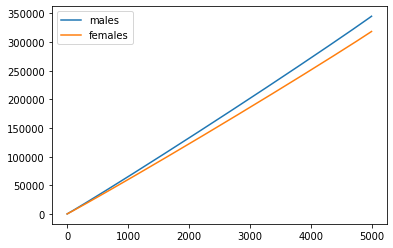

In [52]:
#cumulative sum
plt.plot(np.cumsum((malesHeight.sort_values().reset_index(drop=True))), label='males')
plt.plot(np.cumsum((femalesHeight.sort_values().reset_index(drop=True))), label='females')
plt.legend(loc="upper left")

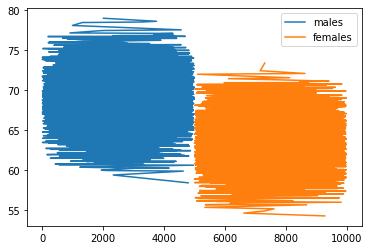

In [36]:
plt.plot(malesHeight.sort_values(), label='males')
plt.plot(femalesHeight.sort_values(), label='females')
plt.legend(loc="upper right")

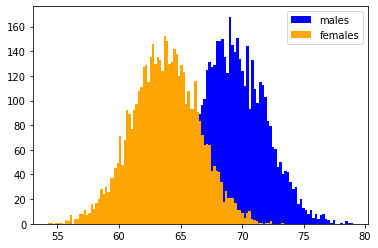

In [37]:
plt.hist(malesHeight.sort_values(), bins=100, color='blue', label='males')
plt.hist(femalesHeight.sort_values(), bins=100, color='orange', label='females')
plt.legend(loc="upper right")

(array([  1.,   1.,   0.,   1.,   1.,   1.,   0.,   3.,   2.,   7.,   0.,
          4.,   4.,   8.,   8.,  11.,   7.,   9.,  16.,  12.,  17.,  20.,
         28.,  24.,  30.,  26.,  37.,  37.,  45.,  49.,  71.,  48.,  68.,
         92.,  89.,  77.,  92.,  97., 108., 111., 127., 129., 115., 135.,
        146., 130., 135., 133., 124., 152., 148., 130., 131., 142., 138.,
        120., 129., 123.,  97., 108.,  93.,  93., 116.,  91.,  83.,  72.,
         64.,  65.,  64.,  43.,  47.,  43.,  42.,  34.,  18.,  27.,  21.,
         21.,  21.,  17.,  11.,  11.,   9.,   5.,   9.,  10.,   4.,   3.,
          2.,   1.,   1.,   0.,   1.,   1.,   2.,   0.,   0.,   0.,   0.,
          1.]),
 array([54.26313333, 54.45439785, 54.64566238, 54.8369269 , 55.02819143,
        55.21945595, 55.41072048, 55.601985  , 55.79324953, 55.98451405,
        56.17577858, 56.3670431 , 56.55830763, 56.74957216, 56.94083668,
        57.13210121, 57.32336573, 57.51463026, 57.70589478, 57.89715931,
        58.08842383, 58.27

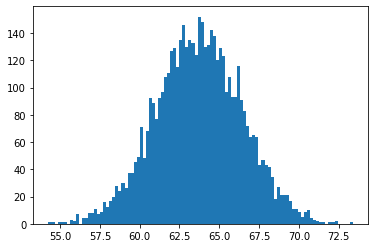

In [38]:
plt.hist(femalesHeight.sort_values(), bins=100)

In [53]:
kstest(malesHeight.sort_values().reset_index(drop=True), femalesHeight.sort_values().reset_index(drop=True))

KstestResult(statistic=0.6664, pvalue=0.0)

In [54]:
kstest(malesHeight, femalesHeight)

KstestResult(statistic=0.6664, pvalue=0.0)

In [55]:
malesHeight.mean()

69.02634590621741

In [56]:
femalesHeight.mean()

63.70877360342507

In [57]:
normalMalesHeight = malesHeight - malesHeight.mean()

In [58]:
normalFemalesHeight = femalesHeight - femalesHeight.mean()

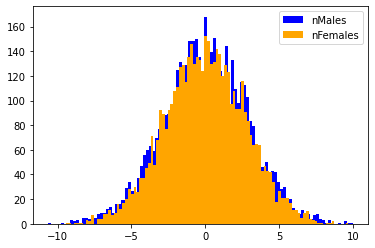

In [59]:
plt.hist(normalMalesHeight.sort_values(), bins=100, color='blue', label='nMales')
plt.hist(normalFemalesHeight.sort_values(), bins=100, color='orange', label='nFemales')
plt.legend(loc="upper right")

In [60]:
kstest(normalMalesHeight, normalFemalesHeight) #2 ways

KstestResult(statistic=0.0194, pvalue=0.3035775745288207)

In [61]:
kstest(normalMalesHeight, 'norm') #1 way

KstestResult(statistic=0.2380852585897515, pvalue=7.336270444284483e-250)

In [62]:
normalMalesHeight.mean()

4.305888978706207e-15

In [63]:
normalMalesHeight.std()

2.863362228660647

In [64]:
idealData = norm.rvs(size=len(normalMalesHeight), loc=normalMalesHeight.mean(), scale=normalMalesHeight.std())
idealData

array([ 2.77877987e+00,  5.79152220e+00, -2.51805079e+00, ...,
       -7.40060992e-04,  2.88945985e+00, -7.47731401e+00])

In [65]:
kstest(normalMalesHeight, idealData)
# از یک توزیع استفاده میکنند هر دو دیتا

KstestResult(statistic=0.0172, pvalue=0.45029268979401865)